In [1]:
from pymongo import MongoClient
from gridfs import GridFS, GridFSBucket

In [2]:
from PIL import Image
from io import BytesIO

In [3]:
db = MongoClient().python_test

In [4]:
fs = GridFS(db)

In [5]:
image_list = list(db.fs.files.find())

In [6]:
# 이미지의 가로세로 맞춰야함
IM_width = 200
IM_HEIGTH = 200

In [7]:
images = []
labels = []

In [8]:
import numpy as np

In [9]:
file_detail = image_list[1]
file_detail

{'_id': ObjectId('5de7480b0a3594cec0e8ff7d'),
 'filename': '20150203001206_0_99_20150204074103.jpg',
 'metadata': {'contentType': 'image/jpg', 'tpye': 'cat'},
 'chunkSize': 261120,
 'md5': '4b784cbf72b85e54976c92f18dcf26b9',
 'length': 34465,
 'uploadDate': datetime.datetime(2019, 12, 4, 5, 45, 47, 137000)}

In [10]:
filename = file_detail["filename"]
filename

'20150203001206_0_99_20150204074103.jpg'

In [11]:
f = fs.get_last_version(filename = filename)

In [12]:
data = f.read()
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01g\x02\x1c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x06\x03\x05\x07\x00\x02\x08\x01\t\xff\xc4\x00E\x10\x00\x02\x01\x03\x03\x02\x04\x04\x04\x03\x06\x05\x03\x03\x04\x03\x01\x02\x03\x00\x04\x11\x05\x12!\x061\x13AQa\x07"q\x81\x142\x91\xa1\x15#B\x08Rb\xb1\xc1\xd1\x16$r\x82\xf03C\xe1\x17S\xf1D\x83\x9

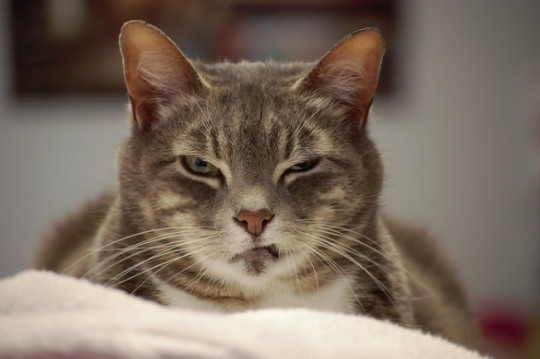

In [13]:
# 문자를 그림으로 바꾸어 봅시다
im = Image.open(BytesIO(data))
im

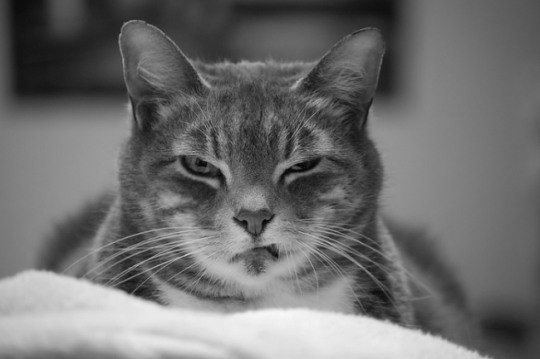

In [14]:
# 흑백을 잘 인식하니까 흑백으로 바꾸어줍시다
im = im.convert('L')
im

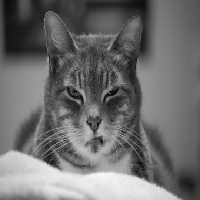

In [15]:
# im = im.resize((IM_WIDTH, IM_GEIGHT))
im = im.resize((200,200))
im

In [16]:
#사진을 배열로 변환
im = np.array(im)
im
# 이 숫자를 가지고 컴퓨터에서 지가 찾음


array([[ 63,  56,  47, ...,  83,  82,  81],
       [ 65,  57,  48, ...,  83,  83,  80],
       [ 66,  57,  49, ...,  83,  83,  82],
       ...,
       [122, 119, 119, ...,  62,  63,  63],
       [115, 111, 109, ...,  63,  64,  65],
       [106, 103, 100, ...,  63,  64,  64]], dtype=uint8)

In [17]:
# 줄과 칸으로 되어있는 2차원 배열임// 이걸로는 비교 못함
# 그래서 일차원 배열로 바꾼다
im = im.flatten()
im
# 일차원으로 변신!

array([63, 56, 47, ..., 63, 64, 64], dtype=uint8)

In [18]:
# 1은 검정/ 0은 흰색 // 비교프로그램이 거지네 일차원배열 + 255로 나누기까지
im = im / 255.0
im
# 소수점아래자리도 너무 많다고 싫답니다
# 맞춰줍시다

array([0.24705882, 0.21960784, 0.18431373, ..., 0.24705882, 0.25098039,
       0.25098039])

In [19]:
# 소수점아래 자리수 좀 줄여줍시다
im = im.astype("float32")
im

array([0.24705882, 0.21960784, 0.18431373, ..., 0.24705882, 0.2509804 ,
       0.2509804 ], dtype=float32)

In [20]:
images.append(im)

In [21]:
# 알고리즘마다 요구하는대로 처리하는 것은 전처리  김전철을 불러보자 김전처리

In [22]:
file_detail

{'_id': ObjectId('5de7480b0a3594cec0e8ff7d'),
 'filename': '20150203001206_0_99_20150204074103.jpg',
 'metadata': {'contentType': 'image/jpg', 'tpye': 'cat'},
 'chunkSize': 261120,
 'md5': '4b784cbf72b85e54976c92f18dcf26b9',
 'length': 34465,
 'uploadDate': datetime.datetime(2019, 12, 4, 5, 45, 47, 137000)}

In [23]:
file_detail["metadata"]["tpye"]

'cat'

In [24]:
# file_detail["metadata"]["tpye"]가 cat을 포함하면 1 거짓이면 0이 실행
label = 1 if "cat" in file_detail["metadata"]["tpye"] else 0

In [25]:
labels.append(label)